<a href="https://colab.research.google.com/github/stepsbtw/Statistical-Inference/blob/main/GCC1625_2025_1_T2_CAIO_PASSOS_TORKST_FERREIRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Máquina desregulada?

Considere que uma máquina de preenchimento de garrafas está configurada para preencher cada garrafa com 500 ml de vinho. O fabricante suspeita de que essa máquina está preenchendo as garrafas com valores a menor. Ele então coleta uma amostra de 20 garrafas preenchidas a partir da linha de produção e mede cuidadosamente o volume em cada uma delas. Os resultados obtidos nessas medições estão a seguir (valores em miligramas):

$$
484.11, 459.49, 471.38, 512.01, 494.48, 528.63, 493.64, 485.03, 473.88, 501.59, 502.85, 538.08, 465.68, 495.03, 475.32, 529.41, 518.13, 464.32, 449.08, 489.27
$$

Nessa parte do trabalho você deve verificar a alegação de que a máquina está desregulada, conforme a suspeita do fabricante.

In [ ]:
# objetivo final: teste de hipoteses sobre uma média
# Amostra deve vir de uma normal
# z-teste (tenho desvio populacional), t-teste (aproximo, graus de liberdade)

sample = np.array([484.11,459.49,471.38,512.01,494.48,528.63,493.64,485.03,473.88,501.59,502.85,538.08,465.68,495.03,475.32,529.41,518.13,464.32,449.08,489.27])

1. Os procedimentos paramétricos de testes de hipóteses sobre uma amostra que estudamos em nosso curso presumem que a amostra a ser usada é proveniente de uma distribuição aproximadamente normal. Para a amostra fornecida verifique essa hipótese usando dois dos testes de normalidade que estudamos no curso, o teste de Shapiro-Wilk e o teste usando QQ-plot. Nessa verificação defina o nível de significância como α = 0.05.

In [ ]:
from scipy import stats
import numpy as np

alpha = 0.05
stat, p = stats.shapiro(sample)
print(p)

0.8223267659331017


Como p > 0.05, a hipótese nula **não** é rejeitada. Existe evidência de que a amostra vem de uma população aproximadamente normal.

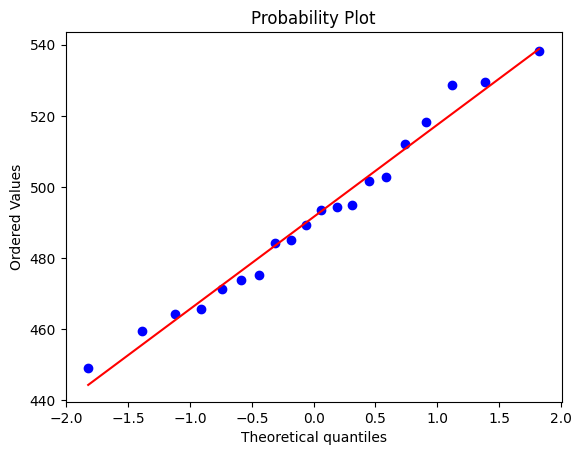

In [ ]:
import matplotlib.pyplot as plt
stats.probplot(sample, dist="norm", plot=plt)
plt.show()

Ao realizar os testes de normalidade conclui-se que sim, a amostra parece vir de uma população aproximadamente normal.

2.  Agora, aplique o teste de hipóteses. Repare que a variância da população é desconhecida; sendo assim, certifique-se de usar o procedimento de teste de hipóteses adequado para essa situação. Apresente sua análise para o nível de significância igual a 1%. Apresente e descreva claramente a aplicação dos quatro passos do procedimento.

In [ ]:
# H0 : μ0 = 500
# Ha : μ < 500 (unilateral a esquerda)

mu0 = 500
mux = sample.mean()
s = sample.std()
n = len(sample)
df = n-1

alpha = 0.01

t = (mux - mu0)/s/np.sqrt(n)
if t < 0:
  p = stats.t.cdf(t,df)
else:
  p = 1 - stats.t.cdf(t,df)

print(p)
if p < alpha:
  print("Rejeita H0")
else:
  print("Não rejeita H0")

0.4693225714227194
Não rejeita H0


Não existe evidência suficiente para rejeitar a hipótese nula.

Com isso, a média não é significantemente diferente de 500 e portanto a máquina não está desregulada.

#2) Um estilo diferente ajuda?

O conjunto de dados fornecido no arquivo golfe.csv lista as pontuações de uma rodada para 75 membros selecionados aleatoriamente em um campo de golfe, primeiro usando seus próprios tacos originais e, dois meses depois, usando novos tacos com um estilo (design) experimental.

Queremos verificar a alegação de que esse novo estilo de taco ajuda no desempenho dos jogadores.

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/AILAB-CEFET-RJ/gcc1625/refs/heads/main/data/golfe.csv", sep=";", index_col=0)
df.head()

,Old Score,New Score
ID,,
1,81,82
2,72,72
3,77,74
4,74,72
5,78,78


(i) Os procedimentos paramétricos de testes de hipóteses sobre duas amostras que estudamos em nosso curso presumem que as amostras a serem usadas são provenientes de uma distribuição aproximadamente normal.

Para cada uma das amostras fornecidas, verifique essa hipótese usando dois dos testes de normalidades que estudamos no curso. Para isso, use um nível de significância igual a 5%.

In [ ]:
from scipy.stats import normaltest

x1 = df["Old Score"]
x2 = df["New Score "]

t1, p1 = normaltest(x1)
t2, p2 = normaltest(x2)

print(p1)
print(p2)

1.4234036860841066e-06
0.0005513413259119283


[]

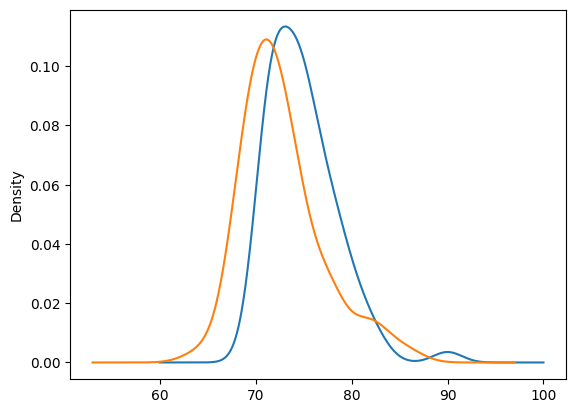

In [ ]:
x1.plot(kind="kde")
x2.plot(kind="kde")
plt.plot()


(ii) Agora, aplique o teste de hipóteses propriamente dito. Apresente e descreva claramente a aplicação dos quatro passos do procedimento. Repare que a variância da população
não é conhecida. Sendo assim, certifique-se de usar o teste de hipóteses adequado para essa situação.

Apresente sua análise para o nível de significância igual a 1%.

In [ ]:
import numpy as np
from scipy.stats import ttest_1samp


xd = x1-x2
s = xd.std(ddof=1)
n = len(df)

t, p = ttest_1samp(xd, popmean=s/np.sqrt(n))
print(t, p)

5.925279320784546 9.151584545391625e-08


Rejeitamos a hipótese nula. Existe evidência de que o novo taco proporcionou sim um desempenho melhor.

#3) Transmissões: automática versus manual

O conjunto de dados mtcars apresenta informações sobre modelos de carros. Esse conjunto de dados contém várias variáveis.

Entretanto para essa parte do trabalho, duas delas são relevantes:

• am - essa variável categórica indica o tipo de sistema de transmissão usado no modelo de automóvel (0 = automatic, 1 = manual). Com base nessa variável, podemos formar duas amostras independentes: veículos com transmissão automática e veículos com transmissão manual.

• mpg (miles per gallon) — variável quantitativa contínua que mede o consumo de combustível, indicando quantas milhas o veículo percorre por galão de combustível. Valores
maiores indicam maior eficiência energética.

Utilizando essas informações, responda aos itens a seguir com base nos métodos estudados em aula.


In [46]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/AILAB-CEFET-RJ/gcc1625/refs/heads/main/data/mtcars.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


(i) Realize uma análise gráfica exploratória comparando o consumo médio de combustível dos dois grupos de veículos. Utilize ao menos dois tipos de gráfico (como boxplot e histogramas sobrepostos) e comente os padrões observados.

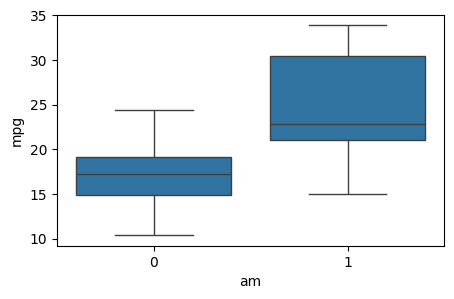

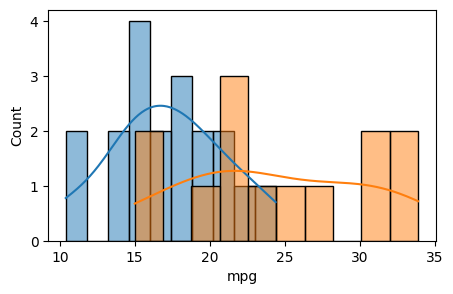

In [55]:
import seaborn as sns
automatico = df[df["am"]==0]
manual = df[df["am"]==1]

plt.figure(figsize=(5, 3))
sns.boxplot(x='am', y='mpg', data=df)
plt.show()

plt.figure(figsize=(5, 3))
sns.histplot(automatico['mpg'], label='Automática', kde=True, bins=10)
sns.histplot(manual['mpg'], label='Manual', kde=True, bins=10)
plt.show()

(ii) Os procedimentos paramétricos de testes de hipóteses sobre duas amostras que estudamos
em nosso curso presumem que as amostras a serem usadas são provenientes de uma
distribuição aproximadamente normal. Para cada uma das amostras fornecidas, verifique
essa hipótese usando dois dos testes de normalidades que estudamos no curso. Para isso,
use um nível de significância igual a 5%.

(iii) Presumindo que os dados da coluna mpg seguem a distribuição normal, determine um intervalo de confiança no nível 95% da diferença entre as médias dos modelos de carros que possuem transmissão automática e os que possuem transmissão manual.

(iv) Suponha que, ao analisar os dados fornecidos, alguém levantou a alegação de que carros automáticos e manuais não apresentam a mesma eficiência relativa a consumo de combustível. Em particular, existe a suspeita de que carros com transmissão manual consumem (em média) menos combustível que suas contrapartidas com transmissão automática.

Aplique um teste de hipóteses para verificar essa suspeita. Apresente e descreva claramente a aplicação dos quatro passos do procedimento. Repare que são fornecidas duas amostras independentes. Sendo assim, certifique-se de usar o teste de hipóteses adequado
para essa situação. Apresente sua análise para o nível de significância igual a 5%.